# Quickstart: Target x Survey, i.e., a DataSet

learn how to merge target inside a survey and simulate a dataset (observed version of target's data)

In [1]:
from skysurvey import survey, target

/Users/rigault/miniforge3/lib/python3.9/site-packages/ztfquery-1.19.0-py3.9.egg/ztfquery/utils/tools.py:78: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.asarray([v[0]*np.cos(theta*_DEG2RA) - v[2]*np.sin(theta*_DEG2RA),


Following what we learned in Quickstart: target, let's create a SNeIa dataset of 5 000 targets

### Target | data given by nature

In [2]:
%%time
snia = target.SNeIa.from_draw(5000)

CPU times: user 130 ms, sys: 9.35 ms, total: 139 ms
Wall time: 138 ms


let's check when "nature started"

In [3]:
starting_date = snia.data["t0"].min()-50 # 50 days before the first target, no need to simulate a survey before that

### Survey | What has been observed when and how. Here ZTF case

In [5]:
%%time
ztf = survey.ZTF.from_random(size=365*4*1000, # number of observation 
                     bands=["ztfg","ztfr","ztfi"], # band to observed
                     mjd_range=[starting_date, starting_date+365*4], # timerange of observation
                     skynoise_range=[10,20], # sky noise
                     )

CPU times: user 1.58 s, sys: 60.5 ms, total: 1.64 s
Wall time: 1.64 s


### Target in Survey | let's check which target belongs to which field.

This is particularly optiomized thanks to a combination of shapely, pandas and geopandas

In [6]:
%%time
fieldid_of_targets = ztf.radec_to_fieldid(*snia.data[["ra","dec"]].values.T)

CPU times: user 327 ms, sys: 4.97 ms, total: 332 ms
Wall time: 333 ms


In [7]:
fieldid_of_targets

index_radec
0            [1401, 1348, 356]
1                  [1295, 302]
2                  [398, 1442]
3       [739, 740, 1777, 1778]
4                  [1465, 471]
                 ...          
4995               [1337, 345]
4996               [261, 1303]
4997               [1806, 803]
4998               [1542, 496]
4999               [605, 1650]
Name: fieldid, Length: 4989, dtype: object

### DataSet | The object that exploite the target x survey combination.

In [8]:
from skysurvey import DataSet

this not only match then SN with the target but already simulate the obseving point. 

In [9]:
%%time
dset = DataSet.from_targets_and_survey(snia, ztf)

CPU times: user 31.7 s, sys: 2.63 s, total: 34.4 s
Wall time: 32.9 s


In [10]:
dset.data

fieldid          time  band       flux    fluxerr    zp zpsys
0    0       1401  58951.977370  ztfg -14.177382  11.104445  25.0    ab
     1       1401  58953.980096  ztfi  -2.873388  12.544028  25.0    ab
     2       1401  58954.125756  ztfi  27.619376  14.611583  25.0    ab
     3       1401  58956.564954  ztfi  18.518079  11.263952  25.0    ab
     4       1401  58958.210149  ztfg  -0.701947  15.435310  25.0    ab
...           ...           ...   ...        ...        ...   ...   ...
4665 790      226  60401.505444  ztfg   8.804617  10.016735  25.0    ab
     791      226  60403.221731  ztfi -10.520663  11.242751  25.0    ab
     792      226  60403.401751  ztfi  -6.004413  18.673622  25.0    ab
     793      226  60403.885961  ztfr  -7.653161  12.538925  25.0    ab
     794      226  60404.156396  ztfi -13.283621  11.568657  25.0    ab

[9288900 rows x 7 columns]

z         0.120500
x1        1.958000
c         0.129000
t0    60010.547881
x0        0.000219
Name: 80, dtype: float64

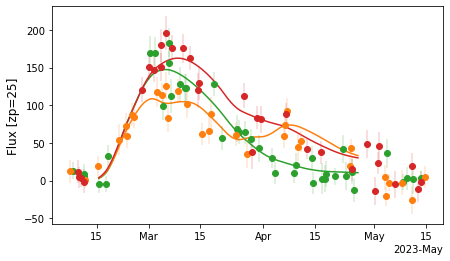

In [14]:
_ = dset.show_target_lightcurve(index=80, phase_window=[-30, 70])
dset.targets.get_template_parameters(index=80)

In [14]:
dset.get_ndetection(perband=True)

level_0  band
0        ztfg    31
         ztfi    23
         ztfr    25
1        ztfg     6
         ztfi    13
                 ..
4998     ztfi    14
         ztfr    16
4999     ztfg    24
         ztfi    26
         ztfr    29
Name: detected, Length: 14961, dtype: int64